## CAPSTONE

## Problem Statement

I am the director of General Assembly Football Club

### Imports

TEST PYTHON TEST

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import tensorflow as tf

In [2]:
df = pd.read_csv('../data/fifa19.csv')

In [3]:
df.shape

(18207, 89)

In [4]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
#df.isnull().sum().sort_values(ascending=False)

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
df.drop(['Unnamed: 0', 'ID', 'Photo', 'Flag', 'Club Logo', 'Special'], axis=1, inplace=True)

In [7]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [9]:
#len(df.Club.unique())
#len(df.Nationality.unique())

In [8]:
df.describe()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.0,18207.0,18207.0,18207.0,18207.0,18207.0,18207.0,...,18207.0,18207.0,18207.0,18207.0,18207.0,18207.0,18207.0,18207.0,18207.0,18207.0
mean,25.122206,66.238699,71.307299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.669943,6.908930,6.136496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,46.000000,48.000000,1.0,1.0,1.0,1.0,5.0,2.0,4.0,...,5.0,3.0,3.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0
25%,21.000000,62.000000,67.000000,1.0,3.0,2.0,8.0,38.0,30.0,44.0,...,39.0,51.0,30.0,26.0,24.0,8.0,8.0,8.0,8.0,8.0
50%,25.000000,66.000000,71.000000,1.0,3.0,2.0,17.0,54.0,49.0,56.0,...,49.0,59.0,53.0,55.0,52.0,11.0,11.0,11.0,11.0,11.0
75%,28.000000,71.000000,75.000000,1.0,3.0,3.0,26.0,64.0,62.0,64.0,...,60.0,67.0,64.0,66.0,64.0,14.0,14.0,14.0,14.0,14.0
max,45.000000,94.000000,95.000000,5.0,5.0,5.0,99.0,93.0,95.0,94.0,...,92.0,96.0,94.0,93.0,91.0,90.0,92.0,91.0,90.0,94.0


## Data Cleaning

### Checking for missing Values

In [9]:
df.isnull().sum().sort_values(ascending=False)

Loaned From    16943
RDM             2085
LCM             2085
LW              2085
RS              2085
               ...  
Dribbling          0
Curve              0
LongPassing        0
BallControl        0
Name               0
Length: 83, dtype: int64

### Dropping Redundant Columns

In [10]:
df.drop(['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'], axis=1, inplace=True)

In [11]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [12]:
#df.loc[:,['Value', 'Release Clause']]
#df[['Value', 'Release Clause']]

In [13]:
# Referenced from Pier Paolo
#Getting rid of all the elements that makes difficult to convert the different columns datatypes
df['Value'] = df['Value'].str.replace('€', '')
df['Value'] = df['Value'].str.replace('K', '000')
df['Value'] = df['Value'].str.replace('M', '')
df['Wage'] = df['Wage'].str.replace('€', '')
df['Wage'] = df['Wage'].str.replace('K', '')

# Changing the datatypes of the selected columns
df.Value = df.Value.astype('float')
df.Wage = df.Wage.astype('int')
df.Name = df.Name.astype('category')

## EDA

### Distribution

#### Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

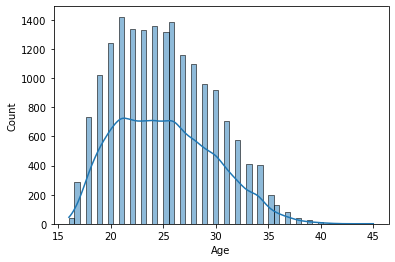

In [14]:
sns.histplot(df, x="Age", kde=True)

<Figure size 864x720 with 0 Axes>

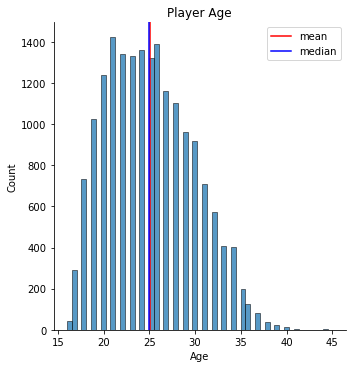

In [15]:
plt.figure(figsize=(12,10))
sns.displot(df['Age'])
plt.ylabel('Count')
plt.title('Player Age')
plt.axvline(df['Age'].mean(), color='r', label='mean')
plt.axvline(df['Age'].median(), color='b', label='median')
plt.legend()

#### Overall vs Age

<AxesSubplot:xlabel='Age', ylabel='Overall'>

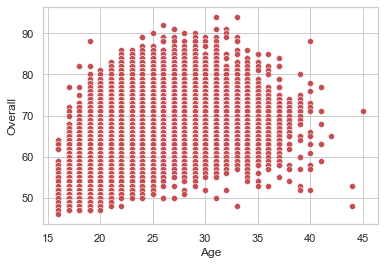

In [16]:
sns.set_theme(color_codes=True)
sns.set_style("whitegrid")
sns.scatterplot(x="Age", y="Overall",
                sizes=(1, 8),
                data=df, color='r')

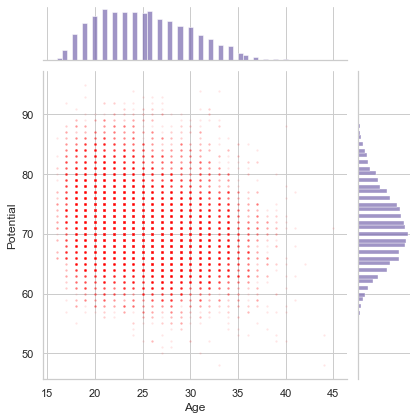

In [17]:
sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'m'})

### Correlation HeatMap

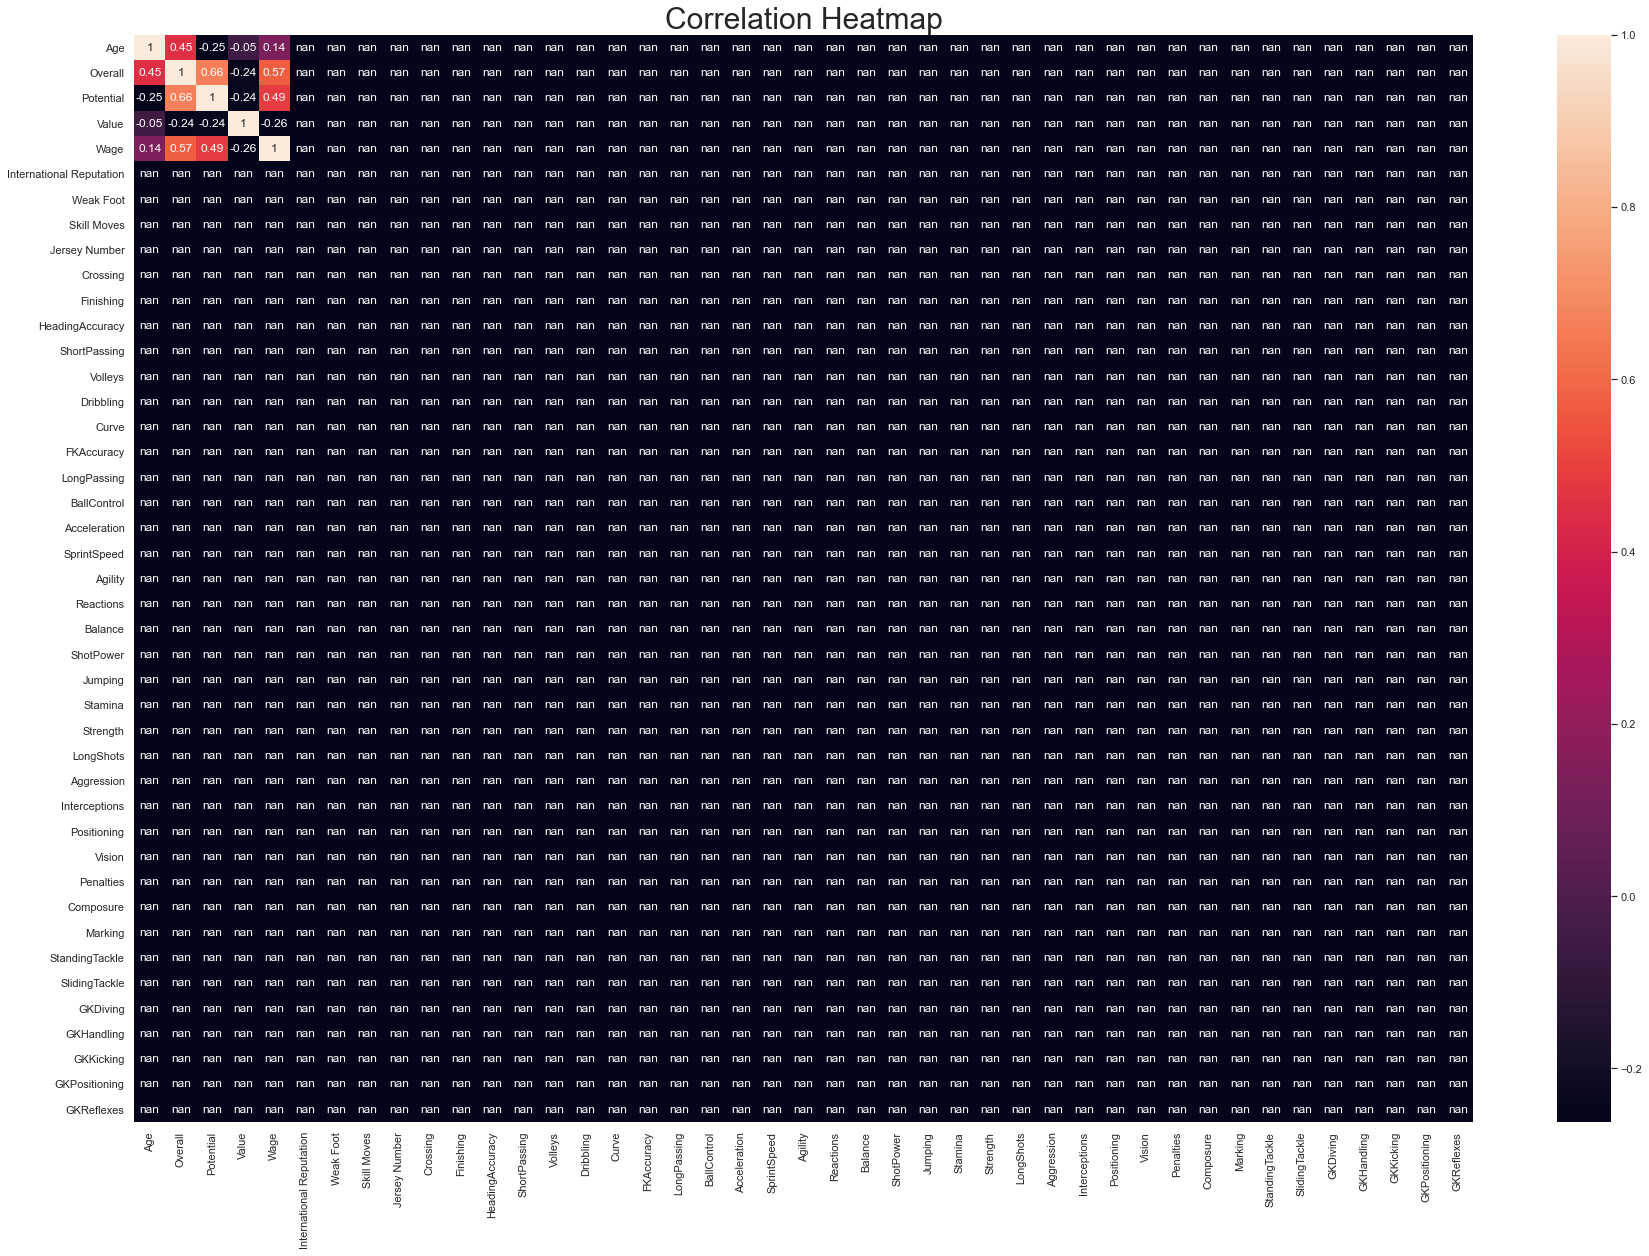

In [18]:
# plotting a correlation heatmap
#adapted from sharmaro shan

plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(df.corr(), annot = True)

plt.title('Correlation Heatmap', fontsize = 30)
plt.show()

In [1]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()[['Overall']].sort_values('Overall', ascending=False), annot=True, cmap='Reds');

NameError: name 'plt' is not defined

In [ ]:
plt.figure(figsize=(20, 15))
sns.regplot(x=df['Age'] , y=df['Overall'])
plt.title('Age vs Overall rating')
plt.show()

In [ ]:
plt.figure(figsize=(20, 15))
sns.relplot(x=df['Age'] , y=df['Overall'])
plt.title('Age vs Overall rating')
plt.show()

In [ ]:
#LM plot
#tips["big_tip"] = (tips.tip / tips.total_bill) > .15
#sns.lmplot(x="total_bill", y="big_tip", data=tips,
 #          y_jitter=.03);
    #sns.lmplot(x="total_bill", y="big_tip", data=tips,
      #     logistic=True, y_jitter=.03);

In [ ]:
#BAR
#misval2 = test.isnull().sum()[test.isnull().sum()>0]
##misval2.sort_values().plot(kind='barh', figsize=(10,10), color='r')
#plt.title('Missing Values of Features (Test)')
#plt.xlabel('Count')
#plt.ylabel('Feature of Missing Value')

In [33]:
#BOX
#cat_features = train.select_dtypes(include = 'object').columns
#subplot_boxplot(train, cat_features)

In [38]:
#input relu
# if output variable binary classification problem use sigmoid
# if output variable multiclassification problem use softmax

In [41]:
#np.corrcoef(x=df['Age'], y=df['Overall'])

In [42]:
df.corr()df['Overall'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().